In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import os, sys, time, random

from ROOT import TTree, TFile

# from root_numpy import root2array, rec2array, array2root

import pandas as pd
import numpy as np
import scipy 
import root_pandas as rp
import root_numpy as ry 

import pandas.core.common as com
from pandas.core.index import Index
from pandas.tools import plotting
from pandas.tools.plotting import scatter_matrix

from tqdm import tqdm_notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.externals import joblib
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score

sys.path.append('/home/chasenberg/repos/')
sys.path.append('/home/chasenberg/repos/dopy')
from dopy import * 
from dopy.dolearn.sklearn_utils import plot_roc_curve, plot_classifier_output, plot_correlations
from dopy.dolearn.sklearn_utils import plot_feature_importances, plot_classifier_output, classify_unseen_data
#from dopy.sklearn_utils import plot_bdt_vars
from dopy.doplot.plotting import Plotter, Plot
from dopy.doanalysis.df_utils import add_min_max, add_eta 

/opt/rh/miniconda/envs/py3root6/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:

bdt_variables = [
#'B0_FitDaughtersConst_chi2',    
#'J_psi_1S_IP_OWNPV',
#'J_psi_1S_IPCHI2_OWNPV',   
#'B0_FitDaughtersConst_Kst_892_0_Kplus_PX',
#'B0_FitDaughtersConst_Kst_892_0_Kplus_PY',  
#'Kst_KS0_PT',
#'Kst_KS0_IP_OWNPV',
#'Kst_KS0_IPCHI2_OWNPV',  
#'Kplus_PT',
#'Kplus_IP_OWNPV',
#'piminus_PT',
#'piminus_IP_OWNPV',
#'piminus_IPCHI2_OWNPV',
'muminus_PT',
#'muminus_IP_OWNPV',
#'muminus_IPCHI2_OWNPV',
'muplus_PT',
#'muplus_IP_OWNPV',
#'muplus_IPCHI2_OWNPV',
#'B0_FitDaughtersConst_J_psi_1S_P0_PT'
]





bdjpsikst_variables = [
'B_FitDaughtersConst_M',
'B_FitDaughtersConst_chi2',   
'B_FitDaughtersConst_J_psi_1S_muminus_PX',
'B_FitDaughtersConst_J_psi_1S_muminus_PY',  
'J_psi_1S_IP_OWNPV',
'J_psi_1S_IPCHI2_OWNPV',   
'B_FitDaughtersConst_Kst_892_0_Kplus_PX',
'B_FitDaughtersConst_Kst_892_0_Kplus_PY',  
'Kst_892_0_PT',
'Kst_892_0_IP_OWNPV',
'Kst_892_0_IPCHI2_OWNPV',  
#'Kplus_PT',
#'Kplus_IP_OWNPV',
'piminus_PT',
'piminus_IP_OWNPV',
'piminus_IPCHI2_OWNPV',
'muminus_PT',
'muminus_IP_OWNPV',
'muminus_IPCHI2_OWNPV',
'muplus_PT',
'muplus_IP_OWNPV',
'muplus_IPCHI2_OWNPV',
'B_L0MuonDecision_TOS',
'B_Hlt1TrackMuonDecision_TOS',
'B_Hlt2DiMuonJPsiDecision_TOS',
'B_FitPVConst_status',
'SigYield_sw'
]

bdjpsikst_variables_rename = [
'B0_FitDaughtersConst_M',
'B0_FitDaughtersConst_chi2',   
'B0_FitDaughtersConst_J_psi_1S_muminus_PX',
'B0_FitDaughtersConst_J_psi_1S_muminus_PY',  
'J_psi_1S_IP_OWNPV',
'J_psi_1S_IPCHI2_OWNPV',   
'B0_FitDaughtersConst_Kst_892_0_Kplus_PX',
'B0_FitDaughtersConst_Kst_892_0_Kplus_PY',  
'Kst_892_0_PT',
'Kst_892_0_IP_OWNPV',
'Kst_892_0_IPCHI2_OWNPV',  
#'Kplus_PT',
#'Kplus_IP_OWNPV',
'piminus_PT',
'piminus_IP_OWNPV',
'piminus_IPCHI2_OWNPV',
'muminus_PT',
'muminus_IP_OWNPV',
'muminus_IPCHI2_OWNPV',
'muplus_PT',
'muplus_IP_OWNPV',
'muplus_IPCHI2_OWNPV',
'B0_L0MuonDecision_TOS',
'B0_Hlt1TrackMuonDecision_TOS',
'B0_Hlt2DiMuonJPsiDecision_TOS',
'B0_FitPVConst_status',
'SigYield_sw',
'B0_FitDaughtersConst_J_psi_1S_muminus_PT'
]

bdjpsiks_variables = [
'B0_FitDaughtersConst_M',
'B0_FitDaughtersConst_chi2',
'B0_FitDaughtersConst_J_psi_1S_P0_PX',
'B0_FitDaughtersConst_J_psi_1S_P0_PY',
'J_psi_1S_IP_OWNPV',
'J_psi_1S_IPCHI2_OWNPV',     
'B0_FitDaughtersConst_KS0_P0_PT',
'B0_FitDaughtersConst_KS0_P1_PT',
'KS0_PT',
'KS0_IP_OWNPV',
'KS0_IPCHI2_OWNPV',
'piminus_PT',
'piminus_IP_OWNPV',
'piminus_IPCHI2_OWNPV',
'muminus_PT',
'muminus_IP_OWNPV',
'muminus_IPCHI2_OWNPV',
'muplus_PT',
'muplus_IP_OWNPV',
'muplus_IPCHI2_OWNPV',
'B0_L0MuonDecision_TOS',
'B0_Hlt1TrackMuonDecision_TOS',
'B0_Hlt2DiMuonJPsiDecision_TOS',
'B0_FitPVConst_status',
'SigYield_sw'
]



bdjpsikst_variables_mc = [
'B0_FitDaughtersConst_M',
'B0_FitDaughtersConst_chi2',
'B0_FitDaughtersConst_J_psi_1S_P0_PX',
'B0_FitDaughtersConst_J_psi_1S_P0_PY',
'J_psi_1S_IP_OWNPV',
'J_psi_1S_IPCHI2_OWNPV',     
'B0_FitDaughtersConst_Kst_892_0_P0_PT',
'B0_FitDaughtersConst_Kst_892_0_P1_PT',  
'Kst_892_0_PT',
'Kst_892_0_IP_OWNPV',
'Kst_892_0_IPCHI2_OWNPV', 
'piminus_PT',
'piminus_IP_OWNPV',
'piminus_IPCHI2_OWNPV',
'muminus_PT',
'muminus_IP_OWNPV',
'muminus_IPCHI2_OWNPV',
'muplus_PT',
'muplus_IP_OWNPV',
'muplus_IPCHI2_OWNPV',
'B0_L0MuonDecision_TOS',
'B0_Hlt1TrackMuonDecision_TOS',
'B0_Hlt2DiMuonJPsiDecision_TOS',
'B0_FitPVConst_status',
'B0_BKGCAT'
]
bdjpsiks_variables_mc = [
'B0_FitDaughtersConst_M',
'B0_FitDaughtersConst_chi2',
'B0_FitDaughtersConst_J_psi_1S_P0_PX',
'B0_FitDaughtersConst_J_psi_1S_P0_PY',
'J_psi_1S_IP_OWNPV',
'J_psi_1S_IPCHI2_OWNPV',     
'B0_FitDaughtersConst_KS0_P0_PT',
'B0_FitDaughtersConst_KS0_P1_PT',
'KS0_PT',
'KS0_IP_OWNPV',
'KS0_IPCHI2_OWNPV',
'piminus_PT',
'piminus_IP_OWNPV',
'piminus_IPCHI2_OWNPV',
'muminus_PT',
'muminus_IP_OWNPV',
'muminus_IPCHI2_OWNPV',
'muplus_PT',
'muplus_IP_OWNPV',
'muplus_IPCHI2_OWNPV',
'B0_L0MuonDecision_TOS',
'B0_Hlt1TrackMuonDecision_TOS',
'B0_Hlt2DiMuonJPsiDecision_TOS',
'B0_FitPVConst_status',
'B0_BKGCAT'
]



In [4]:
len(bdjpsikst_variables), len(bdt_variables)

(25, 2)

In [5]:
#directories and files for Bd2JpsiKst and Bd2JpsiKS
bdjpsikst_data_dir_2015 = '/fhgfs/users/chasenberg/data/2015/jpsikstar/flattened/'
bdjpsikst_data_file_2015 ='Bd2JpsiKst_data_2015_flattened.root'

bdjpsiks_data_dir_2015 = '/fhgfs/users/chasenberg/data/2015/jpsiks/sweights/'
bdjpsiks_data_file_2015 ='Bd2JpsiKS_data_2015_flattened_sw.root'

bdjpsikst_mc_dir = '/fhgfs/users/chasenberg/mc/2016/jpsikstar/flattened/'
bdjpsikst_mc_file = 'Bd2Jpsi2SKst_mc_2016_flattened.root'

bdjpsiks_mc_dir = '/fhgfs/users/chasenberg/mc/2015/jpsiks/dimuon_stripping/flattened/'
bdjpsiks_mc_file = 'Bd2JpsiKS_dimuon_mc_2015_flattened.root'


bdjpsikst_data_dir_2015 = os.path.join(bdjpsikst_data_dir_2015, bdjpsikst_data_file_2015)
bdjpsiks_data_dir_2015 = os.path.join(bdjpsiks_data_dir_2015, bdjpsiks_data_file_2015)
bdjpsikst_mc_dir = os.path.join(bdjpsikst_mc_dir, bdjpsikst_mc_file)
bdjpsiks_mc_dir = os.path.join(bdjpsiks_mc_dir, bdjpsiks_mc_file)

In [6]:
#criteria and information for read in mc
bdjpsikst_cutstring_mc = 'muplus_MINIPCHI2>16&muplus_PT>500&muplus_PIDmu>0&J_psi_1S_M>3036&J_psi_1S_M<3156&Kplus_MINIPCHI2>2&Kplus_PIDK>0&Kplus_PT>500&piminus_MINIPCHI2>2&piminus_PT>500&muplus_PT>500&Kst_892_0_M>826&Kst_892_0_M<966&B0_FitDaughtersConst_IPCHI2<25&B0_FitDaughtersConst_status==0&B0_FitPVConst_status==0&idxPV==0&B0_FitDaughtersConst_M<5350&B0_FitDaughtersConst_M>5220&((B0_BKGCAT==0))&((B0_L0Global_TOS==1)|(B0_Hlt1DiMuonHighMassDecision_TOS==1)|(B0_Hlt2DiMuonDetachedJPsiDecision_TOS==1))'
bdjpsikst_tree_mc = 'Bd2JpsiKst'

bdjpsiks_cutstring_mc = 'B0_FitDaughtersConst_status==0&B0_FitPVConst_status==0&idxPV==0&B0_FitDaughtersConst_M<5350&B0_FitDaughtersConst_M>5220&((B0_BKGCAT==10)|(B0_BKGCAT==50))&((B0_L0Global_TOS==1)|(B0_Hlt1DiMuonHighMassDecision_TOS==1)|(B0_Hlt2DiMuonDetachedJPsiDecision_TOS==1))'
bdjpsiks_tree_mc = 'Bd2JpsiKs'

In [7]:
#Treename for data
bdjpsikst_tree_data = 'Bd2JpsiKst'
bdjpsiks_tree_data = 'Bd2JpsiKs'

In [8]:
print(bdjpsikst_data_dir_2015)

/fhgfs/users/chasenberg/data/2015/jpsikstar/flattened/Bd2JpsiKst_data_2015_flattened.root


In [9]:
#read root files
#2015 Bd2JpsiKst
bdjpsikst_data_2015 = rp.read_root(bdjpsikst_data_dir_2015,key=bdjpsikst_tree_data,columns=bdjpsikst_variables)
bdjpsikst_data_2015 = bdjpsikst_data_2015.replace([np.inf, -np.inf], np.nan)
bdjpsikst_data_2015 = bdjpsikst_data_2015.dropna()

#2015 Bd2JpsiKst data
bdjpsiks_data_2015 = rp.read_root(bdjpsiks_data_dir_2015,key=bdjpsiks_tree_data,columns=bdjpsiks_variables)
bdjpsiks_data_2015 = bdjpsiks_data_2015.replace([np.inf, -np.inf], np.nan)
bdjpsiks_data_2015 = bdjpsiks_data_2015.dropna()

#2015 Bd2JpsiKst mc
bdjpsikst_mc_2015 = rp.read_root(bdjpsikst_mc_dir,key=bdjpsikst_tree_mc,columns=bdjpsikst_variables_mc,where=bdjpsikst_cutstring_mc, flatten=True)
bdjpsikst_mc_2015 = bdjpsikst_mc_2015.replace([np.inf, -np.inf], np.nan)
bdjpsikst_mc_2015 = bdjpsikst_mc_2015.dropna()

#2015 Bd2JpsiKs mc
bdjpsiks_mc_2015 = rp.read_root(bdjpsiks_mc_dir,key='Bd2JpsiK',columns=bdjpsiks_variables_mc,where=bdjpsiks_cutstring_mc, flatten=True)
bdjpsiks_mc_2015 = bdjpsiks_mc_2015.replace([np.inf, -np.inf], np.nan)
bdjpsiks_mc_2015 = bdjpsiks_mc_2015.dropna()

In [10]:
del bdjpsikst_mc_2015['__array_index']
del bdjpsiks_mc_2015['__array_index']

In [11]:
del bdjpsiks_mc_2015['B0_BKGCAT']
del bdjpsikst_mc_2015['B0_BKGCAT']

In [12]:
#Calculate transversal momentum from x and y components
bdjpsiks_mc_2015['B0_FitDaughtersConst_J_psi_1S_P0_PT'] = (bdjpsiks_mc_2015['B0_FitDaughtersConst_J_psi_1S_P0_PX']**2 + bdjpsiks_mc_2015['B0_FitDaughtersConst_J_psi_1S_P0_PY']**2)**0.5

bdjpsikst_mc_2015['B0_FitDaughtersConst_J_psi_1S_P0_PT'] = (bdjpsikst_mc_2015['B0_FitDaughtersConst_J_psi_1S_P0_PX']**2 + bdjpsikst_mc_2015['B0_FitDaughtersConst_J_psi_1S_P0_PY']**2)**0.5

bdjpsikst_data_2015['B0_FitDaughtersConst_J_psi_1S_P0_PT'] = (bdjpsikst_data_2015['B_FitDaughtersConst_J_psi_1S_muminus_PX']**2 + bdjpsikst_data_2015['B_FitDaughtersConst_J_psi_1S_muminus_PY']**2)**0.5

bdjpsiks_data_2015['B0_FitDaughtersConst_J_psi_1S_P0_PT'] = (bdjpsiks_data_2015['B0_FitDaughtersConst_J_psi_1S_P0_PX']**2 + bdjpsiks_data_2015['B0_FitDaughtersConst_J_psi_1S_P0_PY']**2)**0.5


In [13]:
bdjpsikst_data_2015.columns = bdjpsiks_data_2015.columns

In [14]:
#Make equal column names
#bdjpsikst_data_2015.columns = bdjpsikst_variables_rename
#bdjpsiks_data_2015.columns = bdt_variables

#bdjpsikst_mc_2015.columns = bdt_variables
#bdjpsiks_mc_2015.columns = bdt_variables

In [15]:
#Add pseudo weights on MC dataframe
bd2jpsikst_mc_weight = np.ones(len(bdjpsikst_mc_2015))
bdjpsikst_mc_2015['mc_weight'] = bd2jpsikst_mc_weight
bdjpsiks_mc_weight = np.ones(len(bdjpsiks_mc_2015))
bdjpsiks_mc_2015['mc_weight'] = bdjpsiks_mc_weight

In [16]:
'''#add symmetrical variables to dataframe
from dopy.doplot.selection import add_log_to_dataframe, add_max_to_dataframe, add_min_to_dataframe
#choose minimal value of both myon transversal momentums
add_min_to_dataframe(real_df, 'B0_FitDaughtersConst_KS0_min_PT', ['B0_FitDaughtersConst_KS0_P1_PT', 'B0_FitDaughtersConst_KS0_P0_PT'])
add_min_to_dataframe(signal_df, 'B0_FitDaughtersConst_KS0_min_PT', ['B0_FitDaughtersConst_KS0_P1_PT', 'B0_FitDaughtersConst_KS0_P0_PT'])

#choose minimal value of both pions ipchi2
add_min_to_dataframe(real_df, 'test_IP', ['B0_FitDaughtersConst_KS0_P0_IPCHI2', 'B0_FitDaughtersConst_KS0_P1_IPCHI2'])
add_min_to_dataframe(signal_df, 'test_IP', ['B0_FitDaughtersConst_KS0_P0_IPCHI2', 'B0_FitDaughtersConst_KS0_P1_IPCHI2'])

#choose minimal value of both myons transversal momentum
add_min_to_dataframe(real_df, 'B0_FitDaughtersConst_J_psi_1S_min_PT', ['B0_FitDaughtersConst_J_psi_1S_P0_PT', 'B0_FitDaughtersConst_J_psi_1S_P1_PT'])
add_min_to_dataframe(signal_df, 'B0_FitDaughtersConst_J_psi_1S_min_PT', ['B0_FitDaughtersConst_J_psi_1S_P0_PT', 'B0_FitDaughtersConst_J_psi_1S_P1_PT'])

#Generate dimensionless decay-time distribution
real_df['B0_FitPVConst_KS0_tau_dimless'] = real_df['B0_FitPVConst_KS0_tau']/real_df['B0_FitPVConst_KS0_tauErr']
signal_df['B0_FitPVConst_KS0_tau_dimless'] = signal_df['B0_FitPVConst_KS0_tau']/signal_df['B0_FitPVConst_KS0_tauErr']'''

"#add symmetrical variables to dataframe\nfrom dopy.doplot.selection import add_log_to_dataframe, add_max_to_dataframe, add_min_to_dataframe\n#choose minimal value of both myon transversal momentums\nadd_min_to_dataframe(real_df, 'B0_FitDaughtersConst_KS0_min_PT', ['B0_FitDaughtersConst_KS0_P1_PT', 'B0_FitDaughtersConst_KS0_P0_PT'])\nadd_min_to_dataframe(signal_df, 'B0_FitDaughtersConst_KS0_min_PT', ['B0_FitDaughtersConst_KS0_P1_PT', 'B0_FitDaughtersConst_KS0_P0_PT'])\n\n#choose minimal value of both pions ipchi2\nadd_min_to_dataframe(real_df, 'test_IP', ['B0_FitDaughtersConst_KS0_P0_IPCHI2', 'B0_FitDaughtersConst_KS0_P1_IPCHI2'])\nadd_min_to_dataframe(signal_df, 'test_IP', ['B0_FitDaughtersConst_KS0_P0_IPCHI2', 'B0_FitDaughtersConst_KS0_P1_IPCHI2'])\n\n#choose minimal value of both myons transversal momentum\nadd_min_to_dataframe(real_df, 'B0_FitDaughtersConst_J_psi_1S_min_PT', ['B0_FitDaughtersConst_J_psi_1S_P0_PT', 'B0_FitDaughtersConst_J_psi_1S_P1_PT'])\nadd_min_to_dataframe(signal

Simple check of sWeighted data against monte-carlo
----------------------------------------------------------------------

Check of BdJpsiKst
----------------------

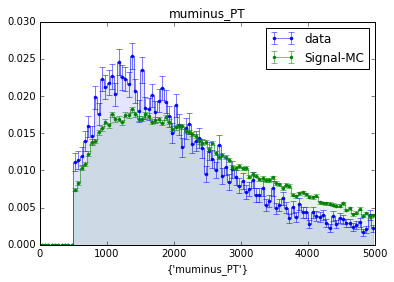

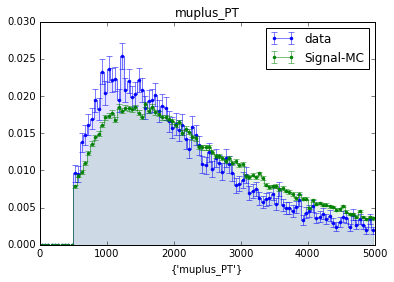

In [17]:
#Check bdt-variables 
for feature in bdt_variables:
    #upper = bdjpsikst_data_2015[feature].quantile(0.95)
    #lower = bdjpsikst_data_2015[feature].quantile(0.01)
    #print("The limits are:")
    #print("---------------")
    #print(upper,lower)
    #print("---------------")
    plotter = Plotter('/home/chasenberg/repos/b2cc_sin2beta/notebooks/selection/plots/reweighting/bd2jpsikst')
    plotter.create_plots([bdjpsikst_data_2015,bdjpsikst_mc_2015], feature, weightvars=['SigYield_sw','mc_weight'], component_labels=['data','Signal-MC'])
    plotter[feature].set_range(0,5000)
    plotter.plot()


In [18]:
#bdjpsikst_data_2015['B0_FitDaughtersConst_chi2'].quantile(0.99).dtype(float)

Check of BdJpsiKs
----------------------

The limits are:
---------------
550.3104710070489 8094.034022198079
---------------


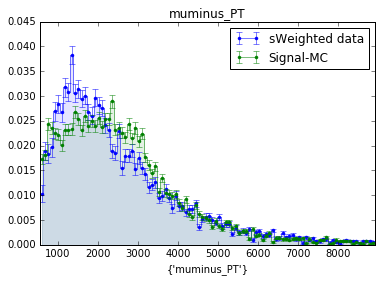

The limits are:
---------------
549.9993216359453 8170.3333473324
---------------


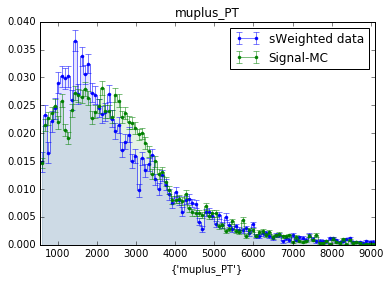

In [19]:
#Check bdt-variables 
for feature in bdt_variables:
    upper = bdjpsiks_data_2015[feature].quantile(0.02)
    lower = bdjpsiks_data_2015[feature].quantile(0.99)
    print("The limits are:")
    print("---------------")
    print(upper,lower)
    print("---------------")
    plotter = Plotter('/home/chasenberg/repos/b2cc_sin2beta/notebooks/selection/plots/reweighting/bd2jpsiks')
    plotter.create_plots([bdjpsiks_data_2015,bdjpsiks_mc_2015], feature, weightvars=['SigYield_sw','mc_weight'],component_labels=['sWeighted data','Signal-MC'])
    plotter[feature].set_range(bdjpsiks_data_2015[feature].quantile(0.02),bdjpsiks_mc_2015[feature].quantile(0.99))
    plotter.plot()
    
    


Start reweighting of Bd2JpsiKst 
---------------------------

In [20]:
real = bdjpsikst_data_2015[bdt_variables]
mc = bdjpsikst_mc_2015[bdt_variables]

In [21]:
import sys
sys.path.append('/home/chasenberg/repos/')
#import hep_ml
from hep_ml.hep_ml.reweight import GBReweighter

In [22]:
gb = GBReweighter(max_depth=2, gb_args={'subsample': 0.5})
gb.fit(mc, real, target_weight=bdjpsikst_data_2015['SigYield_sw'])

GBReweighter(gb_args={'subsample': 0.5}, learning_rate=0.2,
       loss_regularization=5.0, max_depth=2, min_samples_leaf=200,
       n_estimators=40)

Reweight MC sample for BdJpsiKS with full set of bdt-variables
-----------------------------------------------------------------

In [23]:
bdt_variables = [
#'B0_FitDaughtersConst_chi2',    
#'J_psi_1S_IP_OWNPV',
#'J_psi_1S_IPCHI2_OWNPV',   
#'B0_FitDaughtersConst_Kst_892_0_Kplus_PX',
#'B0_FitDaughtersConst_Kst_892_0_Kplus_PY',  
#'Kst_KS0_PT',
#'Kst_KS0_IP_OWNPV',
#'Kst_KS0_IPCHI2_OWNPV',  
#'Kplus_PT',
#'Kplus_IP_OWNPV',
#'piminus_PT',
#'piminus_IP_OWNPV',
#'piminus_IPCHI2_OWNPV',
'muminus_PT',
#'muminus_IP_OWNPV',
#'muminus_IPCHI2_OWNPV',
'muplus_PT',
#'muplus_IP_OWNPV',
#'muplus_IPCHI2_OWNPV',
#'B0_FitDaughtersConst_J_psi_1S_P0_PT'
]



In [24]:
 bdjpsiks_mc_2015['reweights'] = gb.predict_weights(bdjpsiks_mc_2015[bdt_variables])

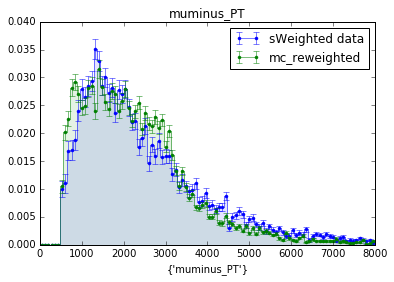

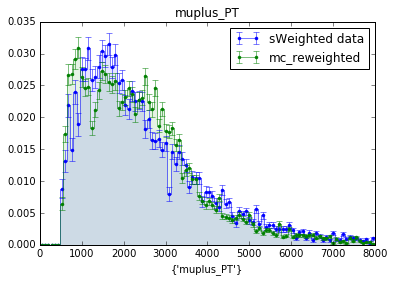

In [25]:
#Check bdt-variables in Bd2JpsiKS
for feature in bdt_variables:
    plotter = Plotter('/home/chasenberg/repos/b2cc_sin2beta/notebooks/selection/plots/reweighting/bd2jpsiks_reweighted')
    plotter.create_plots([bdjpsiks_data_2015,bdjpsiks_mc_2015], feature, weightvars=['SigYield_sw','reweights'],component_labels=['sWeighted data','mc_reweighted'])
    #plotter[feature].set_range(0,bdjpsiks_data_2015[feature].quantile(0.9))
    plotter[feature].set_range(0,8000)
    plotter.plot()

In [26]:
bdjpsikst_mc_2015['reweights'] = gb.predict_weights(bdjpsikst_mc_2015[bdt_variables])

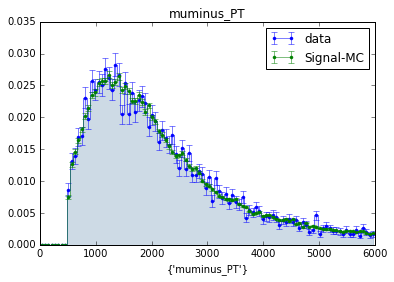

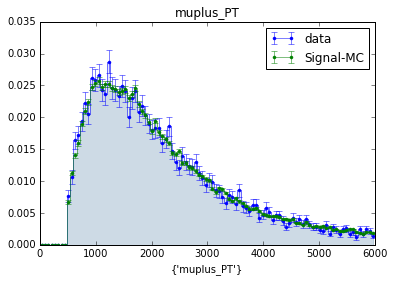

In [27]:
#Check bdt-variables 
for feature in bdt_variables:
    plotter = Plotter('/home/chasenberg/repos/b2cc_sin2beta/notebooks/selection/plots/reweighting/bd2jpsikst_reweighted')
    plotter.create_plots([bdjpsikst_data_2015,bdjpsikst_mc_2015], feature, weightvars=['SigYield_sw','reweights'], component_labels=['data','Signal-MC'])
    plotter[feature].set_range(0,6000)
    plotter.plot()



In [33]:
#add symmetrical variables to dataframe
from dopy.doplot.selection import add_log_to_dataframe, add_max_to_dataframe, add_min_to_dataframe
#choose minimal value of both myon transversal momentums
add_min_to_dataframe(bdjpsiks_data_2015, 'mu_min_PT', ['muplus_PT', 'muminus_PT'])
add_min_to_dataframe(bdjpsiks_mc_2015, 'mu_min_PT', ['muplus_PT', 'muminus_PT'])

In [34]:
symmetrized =['mu_min_PT']

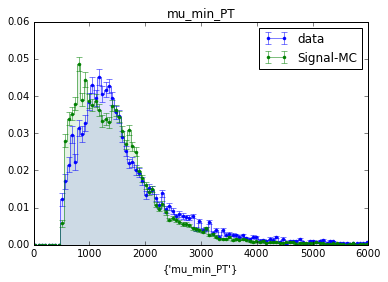

In [35]:
#Check bdt-variables 
for feature in symmetrized:
    plotter = Plotter('/home/chasenberg/repos/b2cc_sin2beta/notebooks/selection/plots/reweighting/bd2jpsiks_reweighted/symmetrical')
    plotter.create_plots([bdjpsiks_data_2015,bdjpsiks_mc_2015], feature, weightvars=['SigYield_sw','reweights'], component_labels=['data','Signal-MC'])
    plotter[feature].set_range(0,6000)
    plotter.plot()


